# Print Data Points
This notebook allows printing both the original and edited images, along with the instruction, based on a given ID.

Install required libraries.

In [2]:
!pip install opencv-python -q

In [3]:
import re
import cv2
import pandas as pd
import matplotlib.pyplot as plt

Functions to process the data.

In [4]:
def read_csv(file_path):
    return pd.read_csv(file_path)


def extract_number_from_text(text, unique_id):
    """Extract id of image name."""
    match = re.search(rf"{re.escape(unique_id)}\.mp4\s+(\d+)", text)
    if match:
        return match.group(1)
    return None


def get_instruction_from_label(labels_df, number):
    """Get Instruction based on id."""
    match_row = labels_df[labels_df["id"] == int(number)]
    if not match_row.empty:
        return match_row["name"].values[0]
    return None


def extract_frames_from_video(video_path):
    "Extract frames out of video. " ""
    cap = cv2.VideoCapture(video_path)
    frames = []

    for _ in range(2):
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    cap.release()
    return frames


def print_sample(dataset, unique_id, save_dir=None):
    if dataset not in ["HumanEdit", "MagicBrush"]:
        print(
            f"Specified dataset {dataset} wrong. Must be either 'HumanEdit' or 'MagicBrush'."
        )
        return

    data_dir = dataset.lower()

    # read label file
    labels = read_csv(f"{data_dir}/labels.csv")

    # read train and test files
    with open(f"{data_dir}/train.txt", "r") as file:
        train = file.read()

    with open(f"{data_dir}/test.txt", "r") as file:
        test = file.read()

    data = train + "\n" + test

    number = extract_number_from_text(data, unique_id)
    if not number:
        print(f"No video named {unique_id}.mp4 found.")
        return

    instruction = get_instruction_from_label(labels, number)

    print(f"Instruction: {instruction}")
    # video_path = f"/home/jovyan/BA/Github/MagicBrush/vifi_format/videos/{unique_id}.mp4"
    video_path = f"{data_dir}/videos/{unique_id}.mp4"
    frames = extract_frames_from_video(video_path)

    fig, axes = plt.subplots(1, len(frames), figsize=(10, 5))
    if len(frames) == 1:
        axes = [axes]

    for i, frame in enumerate(frames):
        axes[i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        axes[i].axis("off")
    axes[0].set_title(f"Input Image")
    axes[1].set_title(f"Edited Image")

    plt.tight_layout()
    if save_dir:
        plt.savefig(save_dir, bbox_inches="tight")
    plt.show()

Specify dataset source and id. For MagicBrush, the unique id consists of {image_id}_{turn_index}.

Instruction: Put a glass of soda on the table.


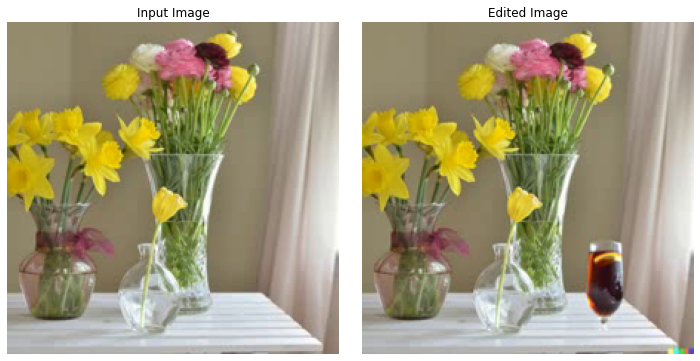

In [12]:
print_sample(dataset="MagicBrush", unique_id="100626_1", save_dir="examples/vase.png")

Instruction: let the cabinets be made of dark wood


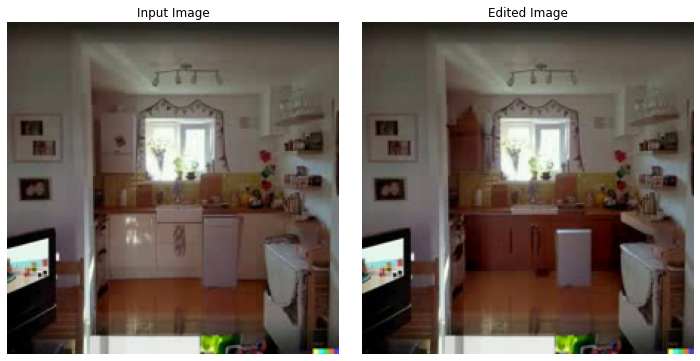

In [6]:
print_sample(dataset="MagicBrush", unique_id="102625_3")

Instruction: the number of pineapples reduces to one


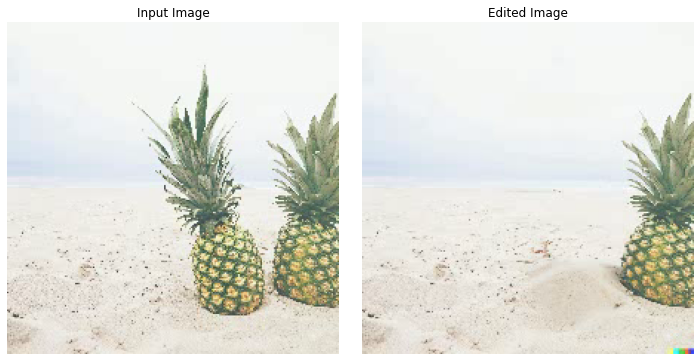

In [22]:
print_sample(dataset="HumanEdit", unique_id="RLak_xZb5sU")